In [48]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import matplotlib.animation as animation
from matplotlib import rc
from matplotlib import rc
from IPython.display import HTML, Image
rc('animation', html='html5')
import seaborn as sns # improves plot aesthetics
import warnings
warnings.filterwarnings('ignore')

In [62]:
path_mapsummary = 'summary_9.txt'
path_length_distribution = 'length_9'
count = 9
count_ = 34  

# mapping ratio plot

## reorganize table

In [47]:
col_names = ['Sample','Raw_reads','Clean_reads','Clean_reads_ratio','rRNA','rRNA_ratio','Kept_reads','hg38','hg38_ratio',
               'miRNA_pre','miRNA_pre_ratio','piRNA','piRNA_ratio','Y_RNA','Y_RNA_ratio',
                'snRNA','snRNA_ratio','srpRNA','srpRNA_ratio','tRNA','tRNA_ratio',
                'other_lncRNA','other_lncRNA_ratio','mRNA','mRNA_ratio']
table = pd.read_table(path_mapsummary,delimiter="\t",names = col_names,index_col=0,skiprows=[0])
Raw_reads = np.array(table.iloc[:,0])
Clean_reads = np.array([np.array(table['Clean_reads_ratio'].str.split(' ')[i])[0] for i in range(count)])
Clean_reads_ratio = np.array([np.array(table['Clean_reads_ratio'].str.split(' '))[i][1][1:-1] for i in range(count)])
Kept_reads = np.array(table.iloc[:,3]) 
rRNA = np.array(table.iloc[:,4]) 
rRNA_ratio = np.array(table.iloc[:,5]) 
hg38 = np.array(table.iloc[:,6]) 
hg38_ratio = np.array(table.iloc[:,7]) 
miRNA_pre = np.array(table.iloc[:,8]) 
miRNA_pre_ratio = np.array(table.iloc[:,9]) 
piRNA = np.array(table.iloc[:,10]) 
piRNA_ratio = np.array(table.iloc[:,11]) 
Y_RNA = np.array(table.iloc[:,12]) 
Y_RNA_ratio = np.array(table.iloc[:,13]) 
snRNA = np.array(table.iloc[:,14]) 
snRNA_ratio = np.array(table.iloc[:,15]) 
srpRNA = np.array(table.iloc[:,16]) 
srpRNA_ratio = np.array(table.iloc[:,17]) 
tRNA = np.array(table.iloc[:,18]) 
tRNA_ratio = np.array(table.iloc[:,19]) 
other_lncRNA = np.array(table.iloc[:,20]) 
other_lncRNA_ratio = np.array(table.iloc[:,21]) 
mRNA = np.array(table.iloc[:,22]) 
mRNA_ratio = np.array(table.iloc[:,23])
newarray = np.concatenate((Raw_reads,pd.Series(Clean_reads),pd.Series(Clean_reads_ratio),rRNA,rRNA_ratio,Kept_reads,hg38,hg38_ratio,
            miRNA_pre,miRNA_pre_ratio,piRNA,piRNA_ratio,Y_RNA,Y_RNA_ratio,
                snRNA,snRNA_ratio,srpRNA,srpRNA_ratio,tRNA,tRNA_ratio,
                other_lncRNA,other_lncRNA_ratio,mRNA,mRNA_ratio),axis=0).reshape(-1,count).T
newtable = pd.DataFrame(newarray)
newtable.columns = col_names[1:]
newtable['other_genomic_region'] = newtable['hg38'] - (newtable['miRNA_pre'] +newtable['piRNA'] +
                 newtable['Y_RNA'] +newtable['snRNA']+newtable['srpRNA']+
                    newtable['tRNA']+newtable['other_lncRNA']+newtable['mRNA'])
newtable['non_human'] = newtable['Kept_reads'] - newtable['hg38']
newtable['other_genomic_region_ratio'] = newtable['other_genomic_region']/newtable['Kept_reads']
newtable['non_human_ratio'] = newtable['non_human']/newtable['Kept_reads']

## calculate average
and add to table

In [49]:
def p2f(x):
    return float(x.strip('%'))/100
indexper = np.concatenate((np.array([2,4]),np.arange(7,25,2)))
newarray_per = np.array(newtable).copy()
for i in indexper:
    for j in range(count):
        newarray_per[j,i] = p2f(newarray[j,i])
newarray_per = newarray_per.astype('float')
average = np.average(newarray_per,axis=0)
avedf = pd.DataFrame(average.reshape(1,-1),columns=newtable.columns,index=['average'])
newtable.append(avedf).tail(3)
indper = [2,4,7,9,11,13,15,17,19,21,23,26,27]
indint = np.setdiff1d(range(28),indper)
average[indint] = average[indint].astype('int')
strper =  ['{:.4f}%'.format(average[indper][i]*100) for i in range(13)] 
average = average.astype('str')
average[indper] = strper
average
avedf = pd.DataFrame(average.reshape(1,-1),columns=newtable.columns,index=['average'])
newtable.append(avedf).tail()
newtable.append(avedf).to_csv('9sample.csv')
convind = [2,4,7,9,11,13,15,17,19,21,23,26,27]
average[convind] = np.array([float(average[convind][i][:-1])*0.01 for i in range(average[convind].shape[0])])
average = average.astype('float')

## prepare for plot

In [20]:
rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'snRNA','srpRNA','tRNA',
            'lncRNA','mRNA','other_genomic_region','non_human',
            ]
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)] 
for i in range(len(tableau20)):  
    r, g, b = tableau20[i]  
    tableau20[i] = (r / 255., g / 255., b / 255.) 
colours = tableau20[:10]
rnaindex= [9,11,13,15,17,19,21,23,26,27]

### pie plot

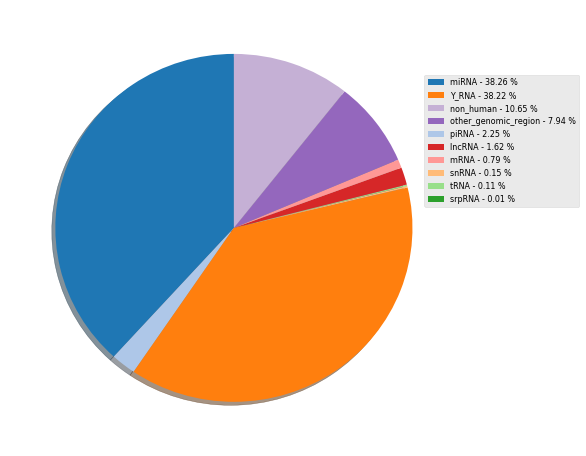

In [50]:
rnaindex_ = [8,10,12,14,16,18,20,22,24,25]
x = rnanames
y = average[rnaindex_]/average[5]
z = np.array([float('{:.4f}'.format(y[i])) for i in range(y.shape[0])])*100

fig1, ax1 = plt.subplots(figsize=(8,8))
patches, texts = ax1.pie(y,  colors=colours, #autopct='%1.1f%%',
                        shadow=True, startangle=90)

labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]

sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))

plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)

In [51]:
randnarr = np.random.uniform(-18,18,count).reshape(-1,1)
for i in range(9):
    randnarr = np.concatenate((randnarr,np.random.uniform(-18,18,count).reshape(-1,1)),axis=1)
ratiodata = [newarray_per[i,rnaindex_]/newarray_per[i,5] for i in range(count)]
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
dataarr =ratiodata
colave =  average[rnaindex]
sizes = np.repeat(16,10) +np.ceil((colave/np.average(colave) *2))
transformed = scalar.fit_transform(dataarr)
#dattest = pd.DataFrame(transformed)
angle = np.repeat(np.arange(0,360,36),count).reshape(10,-1).T +randnarr
#sizes = np.ceil((colave/np.average(colave) *10))
data_r = np.multiply(transformed,np.repeat(10,count*10).reshape(count,-1))
data_theta = np.multiply(transformed,np.repeat(36,count*10).reshape(count,-1))+angle
concatdata = pd.concat((pd.DataFrame(data_r,columns=['trial_'+str(i+1)+'_r' for i in range(10)]),
          pd.DataFrame(data_theta,columns=['trial_'+str(i+1)+'_theta' for i in range(10)])),axis=1)

### scatter in round

In [52]:
import plotly
import plotly.offline as off
import plotly.plotly as py
import plotly.graph_objs as go
text_per = [['{:.3f}%'.format(ratiodata[i][j]*100) for i in range(count)] for j in range(10)]
data1 = [go.Scatterpolar(
      r = concatdata['trial_'+str(i+1)+'_r'],
      theta = concatdata['trial_'+str(i+1)+'_theta'],
      mode = "markers",
      name = rnanames[i],
      text = text_per[i],
      marker = dict(
        color = ['rgb(230,171,2)' ,"rgb(102,166,30)","rgb(231,41,138)" ,"rgb(117,112,179)"  ,"rgb(217,95,2)"
 ,"rgb(27,158,119)" ,"rgb(61,74,192)","rgb(47,192,66)","rgb(182,192,47)","rgb(187,47,192)"][i],
        size = sizes[i],
        line = dict(
          color = "white"
        ),
        opacity = 0.7
      ),
      cliponaxis = False
    ) for i in range(10)]
#data
layout = go.Layout(
    title = "RNA",
    font = dict(
      size = 15
    ),
    showlegend = False,
    polar = dict(
      bgcolor = "rgb(223, 223, 223)",
      angularaxis = dict(
        tickwidth = 2,
        linewidth = 3,
        layer = "below traces"
      ),
      radialaxis = dict(
        side = "counterclockwise",
        showline = True,
        linewidth = 2,
        tickwidth = 2,
        gridcolor = "white",
        gridwidth = 2
      )
    ),
    paper_bgcolor = "rgb(223, 223, 223)"
)

fig = go.Figure(data=data1, layout=layout)
py.iplot(fig, validate = False)

### animation

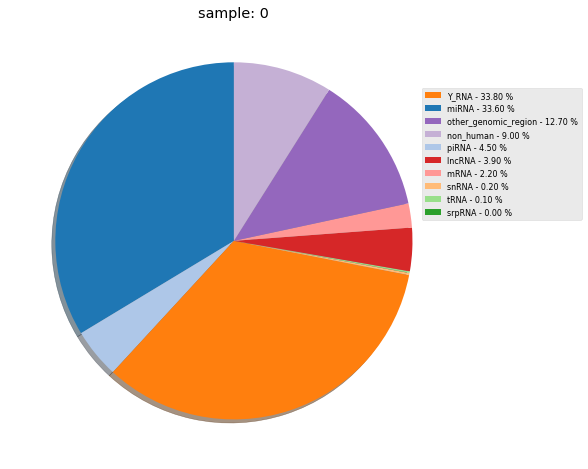

In [53]:
from matplotlib.animation import FuncAnimation
colors = tableau20[:10]
explode = (0,0,0,0,0,0,0.0, 0.0, 0.0, 0.0)
#rnanames = ['miRNA', 'piRNA', 'Y_RNA', 'other_genome','NonHuman','snRNA','srpRNA','tRNA','lncRNA','mRNA']
fig, ax = plt.subplots(figsize=(8,8))
def update(num):
    ax.clear()
    ax.axis('equal')
    x = rnanames
    y = ratiodata[num]
    z = np.array([float('{:.3f}'.format(y[i])) for i in range(y.shape[0])])*100
    patches, texts = ax.pie(y,  colors=colours, 
                        shadow=True, startangle=90)
    ax.set_title('sample: '+str(num))
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, z)]
    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                          key=lambda x: x[2],
                                          reverse=True))
    plt.legend(patches, labels, loc='center', bbox_to_anchor=(1.1, .7),
           fontsize=8)
ani = FuncAnimation(fig, update, frames=range(count), interval=500,repeat=True)
ani

### Boxplot

[Text(0,0,u'0.0%'),
 Text(0,0,u'10.0%'),
 Text(0,0,u'20.0%'),
 Text(0,0,u'30.0%'),
 Text(0,0,u'40.0%'),
 Text(0,0,u'50.0%'),
 Text(0,0,u'60.0%'),
 Text(0,0,u'70.0%'),
 Text(0,0,u'80.0%'),
 Text(0,0,u'90.0%')]

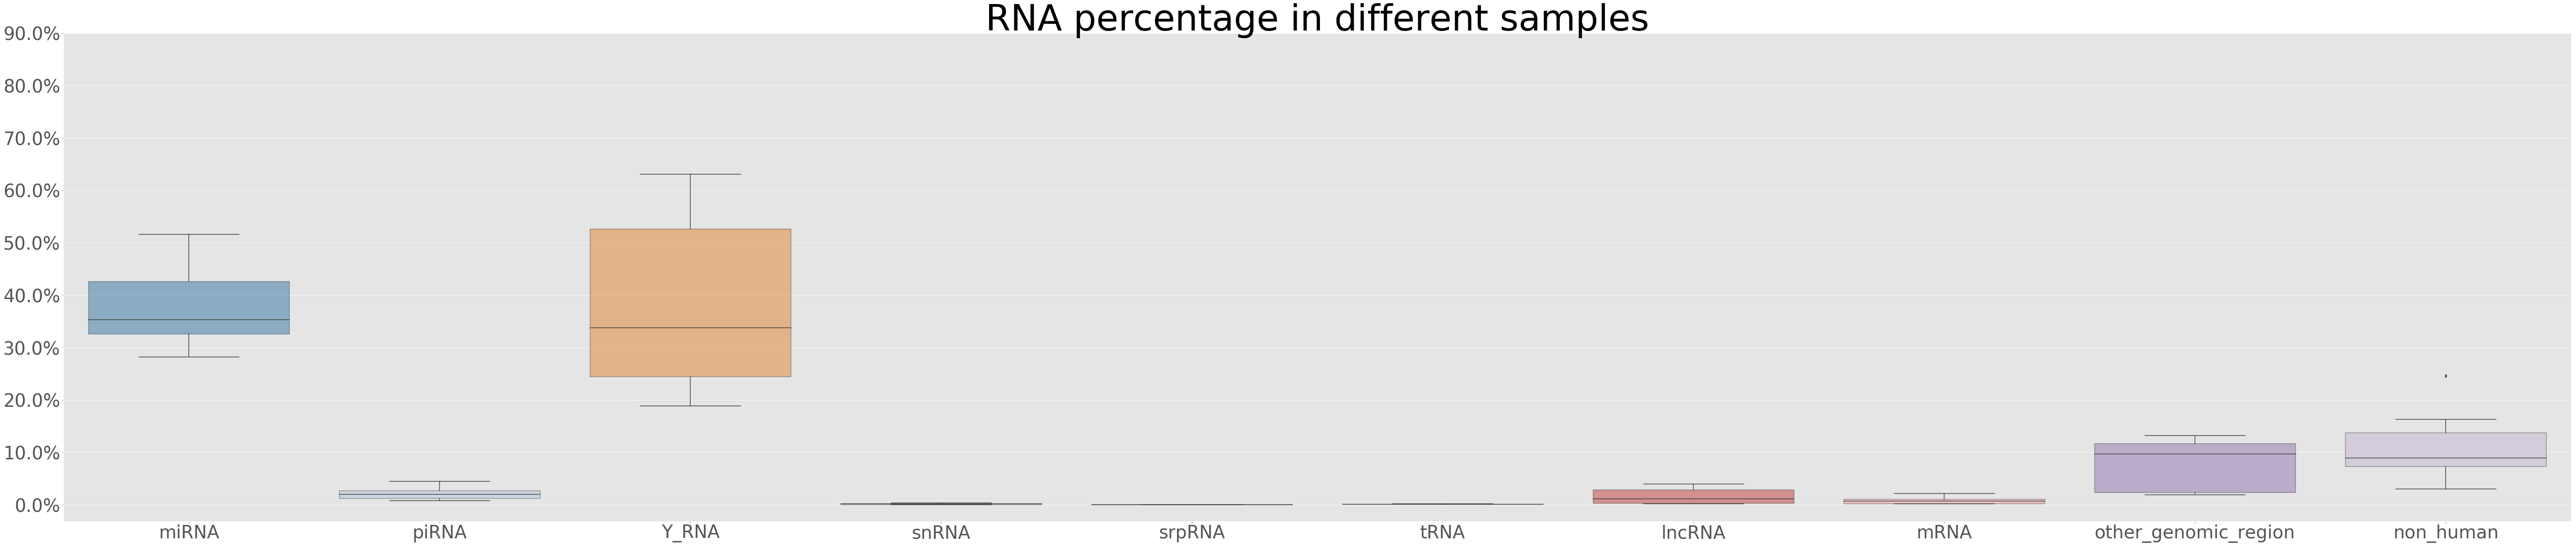

In [54]:
percentagedf = pd.DataFrame([[ratiodata[i][j] for i in range(count)] for j in range(10)]).T
percentagedf.columns = rnanames
my_pal = {}
for i in range(10):
    my_pal[rnanames[i]] = tableau20[i]
fig, ax = plt.subplots(figsize=(100,20))
sns.boxplot(data =percentagedf,ax=ax,boxprops=dict(alpha=.5),palette=my_pal)
ax.set_title(u'RNA percentage in different samples',fontsize=80)
ax.set_xticks(range(10))
ax.set_xticklabels(rnanames,fontsize=40)
ax.set_yticks(np.arange(0,1,0.1))
ax.set_yticklabels(['{:.1f}%'.format(i*10) for i in range(10)],fontsize=40)

# read length distribution

In [55]:
lengthname = np.loadtxt(path_length_distribution,dtype='str')[0]
lengthdat = np.loadtxt(path_length_distribution,dtype='str')[1:].astype('float')

### 3D plot of length distribution

azim: 50


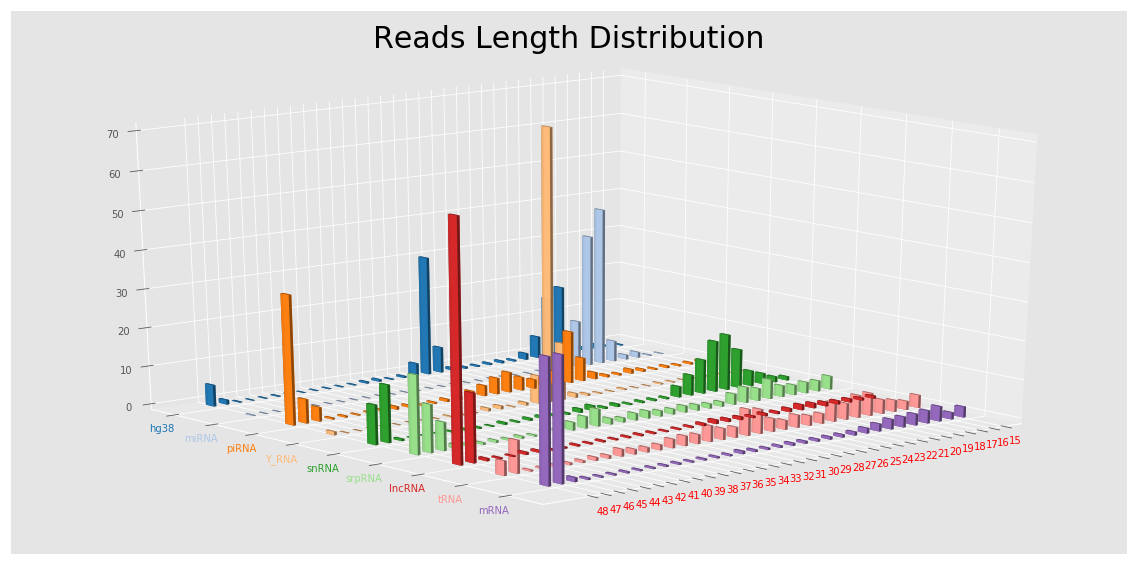

In [56]:
from mpl_toolkits.mplot3d import Axes3D
def plot_3d(azim=50,elev=20):
    fig = plt.figure(figsize=(20,10))
    ax1 = fig.gca(projection="3d")
    xpos = np.repeat(np.arange(1,count_+1),9).reshape(count_,-1).T.ravel()
    ypos = np.repeat(range(9),count_).ravel()
    num_elements = len(xpos)
    zpos = np.zeros(count_*9)
    dx = np.ones(count_*9)/5
    dy = np.ones(count_*9)/5
    dz = lengthdat.T.ravel()
    for i in range(9):
        ax1.bar3d(xpos[count_*i:count_*(i+1)], ypos[count_*i:count_*(i+1)], zpos[count_*i:count_*(i+1)],
                  dx[count_*i:count_*(i+1)], dy[count_*i:count_*(i+1)],dz[count_*i:count_*(i+1)], color=tableau20[i],alpha=0.9)
    plt.xticks(range(count_), [str(i+15) for i in range(count_)], color='red')
    #for i in range(9):
    ax1.set_yticks(range(9))
    ax1.set_yticklabels(lengthname, color='blue')
    for color,tick in zip(tableau20[:9],ax1.yaxis.get_major_ticks()):
        tick.label1.set_color(color)
    ax1.view_init(azim=azim,elev=elev)  # 50 20
    ax1.set_title('Reads Length Distribution',fontsize=30)
    print ('azim: '+str(azim))
    plt.show()
for i in [50]:#,60,70,110,120,130]:
    plot_3d(i,20)

### ratio of RNAs in specific length region
**for example: 28~32**

In [57]:
def get_length_info_pie(lengthrange):
    lenrange = lengthrange-15
    return np.around(np.sum(lengthdat[lenrange],axis=0),decimals=2)
get_length_info_pie(np.arange(28,32))
labels = ['hg38', 'miRNA', 'piRNA', 'Y_RNA', 'snRNA', 'srpRNA', 'lncRNA',
        'tRNA', 'mRNA']
values = get_length_info_pie(np.arange(28,32))
colors = tableau20[:9]

trace = go.Pie(labels=labels, values=values,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=13),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

py.iplot([trace], filename='styled_pie_chart')

In [59]:
fig = {"data": [{"values": get_length_info_pie(np.arange(29,31)),
      "labels": ['hg38', 'miRNA', 'piRNA', 'Y_RNA', 'snRNA', 'srpRNA', 'lncRNA',
        'tRNA', 'mRNA'],"domain": {"x": [0, .48]},"name": "29-31",
      "hoverinfo":"label+percent+name","hole": .4,"type": "pie"},  {"values": get_length_info_pie(np.arange(28,32)),
      "labels": ['hg38', 'miRNA', 'piRNA', 'Y_RNA', 'snRNA', 'srpRNA', 'lncRNA',
        'tRNA', 'mRNA'],"text":"CO2","textposition":"inside","domain": {"x": [.52, 1]},
      "name": "28-32","hoverinfo":"label+percent+name",
      "hole": .4,"type": "pie"}],"layout": {"title":"Reads Length in Specific Range",
        "annotations": [{"font": {"size": 14},"showarrow": False,"text": "Length: 29-31","x": 0.180,"y": 0.5},
            {"font": {"size": 14},"showarrow": False,"text": "Length: 28-32","x": 0.82,"y": 0.5}]}}
py.iplot(fig, filename='donut')

### scatter of length distribution

In [60]:
xpos = np.repeat(np.arange(1,count_+1),9).reshape(count_,-1).T.ravel()
ypos = np.repeat(range(9),count_).ravel()
dz = lengthdat.T.ravel()
dfnew = pd.DataFrame(np.concatenate((xpos.reshape(-1,1),ypos.reshape(-1,1),dz.reshape(-1,1),dz.reshape(-1,1)*100),axis=1))
dfnew.columns = ['x','y','percentage','size']
dfnew['rnaname'] = np.repeat(np.array(lengthname),34)
hover_text = []
for index, row in dfnew.iterrows():
    hover_text.append(('RNA: {country}<br>'+
                      'Reads Length: {lifeExp}<br>'+
                      'Reads percentage: {gdp}<br>'
                      ).format(country=row['rnaname'],lifeExp=row['x'],gdp=row['percentage']))
sizeref = 2.*max(dfnew['size'])/(100**2)
dfnew['text'] = hover_text
data = [go.Scatter(y=dfnew['y'][dfnew['rnaname'] ==lengthname[i]],x=dfnew['x'][dfnew['rnaname'] == lengthname[i]]+15,
    mode='markers',name=lengthname[i],text=dfnew['text'][dfnew['rnaname'] == lengthname[i]],
    marker=dict(symbol='circle',sizemode='area',size=dfnew['size'][dfnew['rnaname'] == lengthname[i]],
        line=dict(width=2),)) for i in range(8)]
layout = go.Layout(
    title='Reads Length Distribution',
    xaxis=dict(title='Length',gridcolor='rgb(255, 255, 255)',range=[10,60],zerolinewidth=1,ticklen=5,gridwidth=2,),
    yaxis=dict(
        title='RNA',gridcolor='rgb(255, 255, 255)',range=[-1,8],zerolinewidth=1,ticklen=5,gridwidth=2,
    ),paper_bgcolor='rgb(243, 243, 243)',plot_bgcolor='rgb(243, 243, 243)',)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='life-expectancy-per-GDP-2007')

### line of length distribution

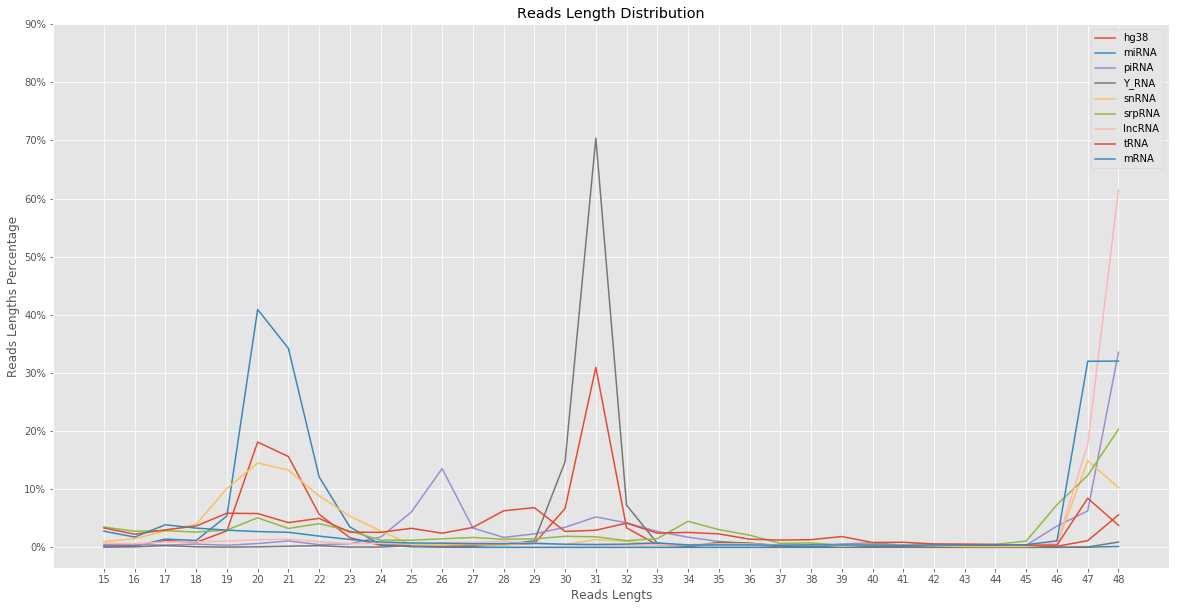

In [61]:
fig, ax = plt.subplots(1,figsize=(20,10))
labels = lengthname
for y_arr, label in zip(lengthdat.T, labels):
    plt.plot(y_arr, label=label)
ax.set_title('Reads Length Distribution')
ax.set_xlabel('Reads Lengts')
ax.set_ylabel('Reads Lengths Percentage')
ax.set_xticks(range(count_))
ax.set_yticks(np.arange(0,100,10))
labels = [item.get_text() for item in ax.get_xticklabels()]
for i in range(count_):
    labels[i] = str(i+15)
labels_y = [item.get_text() for item in ax.get_yticklabels()]
for i in range(10):
    labels_y[i] = str(i*10)+'%'
ax.set_xticklabels(labels)
ax.set_yticklabels(labels_y)
plt.legend()
plt.show()